
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [ ]:
student_number = '400109768'
first_name = 'Seyed Hamid'
last_name = 'Ghasemi'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [ ]:
# TODO: Write your code here
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from IPython.display import display
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [ ]:
# TODO: Write your code here

# Load the data
df_original = pd.read_csv('/content/drive/MyDrive/IML_CHW4_Q2/spotify.csv')

# Select the relevant features
relevant_features = ['track_name', 'danceability', 'energy', 'valence', 'tempo', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']
df = df_original[relevant_features]
df.head()

track_name  danceability  energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...         0.748   0.916   
1                    Memories - Dillon Francis Remix         0.726   0.815   
2                    All the Time - Don Diablo Remix         0.675   0.931   
3                  Call You Mine - Keanu Silva Remix         0.718   0.930   
4            Someone You Loved - Future Humans Remix         0.650   0.833   

   valence    tempo  acousticness  instrumentalness  liveness  speechiness  
0    0.518  122.036        0.1020          0.000000    0.0653       0.0583  
1    0.693   99.972        0.0724          0.004210    0.3570       0.0373  
2    0.613  124.008        0.0794          0.000023    0.1100       0.0742  
3    0.277  121.956        0.0287          0.000009    0.2040       0.1020  
4    0.725  123.976        0.0803          0.000000    0.0833       0.0359

In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

Before applying clustering algorithms like K-means, it is important to standardize the data to ensure that all features contribute equally to the distance calculations. This is because clustering algorithms are sensitive to the scale of the features, and features with larger ranges can dominate the distance calculations, leading to biased clusters.

If you don't standardize the data, features with larger ranges can dominate the distance calculations in clustering algorithms like K-means. This can lead to clusters that are biased towards the features with larger scales, and the resulting clusters may not accurately represent the underlying structure of the data

For example, if you have features like income and age, and the range of income is much larger than the range of age, the K-means algorithm will be more influenced by the income feature when calculating distances between data points. This can result in clusters that are primarily based on income, even if age is also an important factor in determining the clusters.

By standardizing the data, you ensure that all features contribute equally to the distance calculations, leading to more meaningful and accurate clusters. This is especially important when the features are measured in different units or have vastly different scales.

In [ ]:
# TODO: Write your code here
def standard_scaler(X):

    X_std = X.copy()

    for col in range(X.shape[1]):
        col_mean = np.mean(X[:, col])
        col_std = np.std(X[:, col])
        X_std[:, col] = (X[:, col] - col_mean) / col_std

    return X_std

In [ ]:
standard_data = standard_scaler(df.drop('track_name', axis=1).values)
standard_data

array([[ 0.64204909,  1.20161406,  0.03190765, ..., -0.37795302,
        -0.80922951, -0.48136238],
       [ 0.49041187,  0.64331701,  0.78252179, ..., -0.35917738,
         1.0810607 , -0.68864166],
       [ 0.13888922,  1.28452946,  0.43938389, ..., -0.3778491 ,
        -0.51956214, -0.32442236],
       ...,
       [-0.86743053,  0.67648317, -0.31980869, ..., -0.37794807,
        -0.26035197, -0.58204088],
       [-0.19884823,  1.04683864, -0.86882932, ...,  0.18843803,
         0.99033713,  0.01906902],
       [-0.35737806,  1.02472786, -1.80645361, ...,  1.14282924,
         3.57595864, -0.67679713]])

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

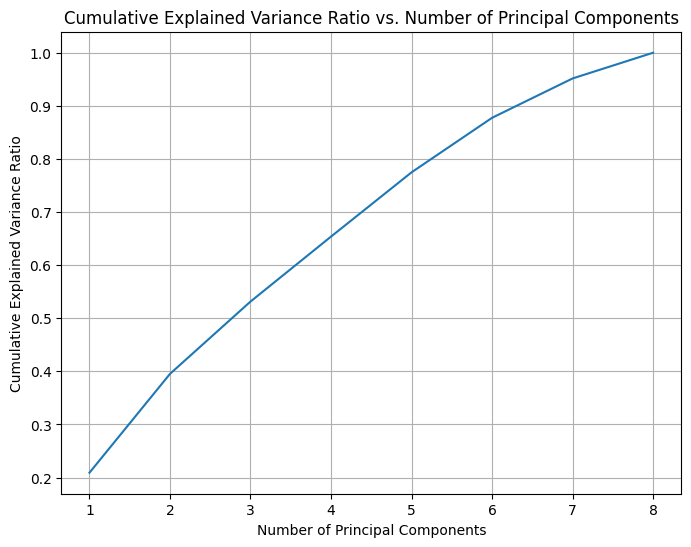

Retaining 7 principal components, which explain 95.15% of the total variance.


In [ ]:
# TODO: Write your code here
pca = PCA()
pca.fit_transform(standard_data)
cumulative_variace  = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variace)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid()
plt.show()

# the number of principal components required to explain at least 90% of the variance in the data
total_variance = sum(pca.explained_variance_ratio_)
num_components = next(i for i, v in enumerate(np.cumsum(pca.explained_variance_ratio_)) if v >= 0.9)
print(f"Retaining {num_components+1} principal components, which explain {cumulative_variace[num_components]:.2%} of the total variance.")

In [ ]:
pca = PCA(n_components=num_components+1)
X_pca = pca.fit_transform(standard_data)

print(f"Shape of the Normalized Features: {standard_data.shape}")
print(f"Shape of the reduced Normalized Features: {X_pca.shape}")

Shape of the Normalized Features: (32833, 8)
Shape of the reduced Normalized Features: (32833, 7)


# Clustering

Implement K-means for clustering from scratch.

In [ ]:
# TODO: Write your code here

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia = None

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign data points to the nearest centroid
            self.labels = np.argmin(np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2)), axis=0)

            # Update centroids
            new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.sqrt(((self.centroids - new_centroids)**2).sum()) < self.tol:
                break

            self.centroids = new_centroids

        # Compute inertia
        self.inertia = np.sum([np.sum((X[self.labels == i] - self.centroids[i])**2) for i in range(self.n_clusters)])

        return self

Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

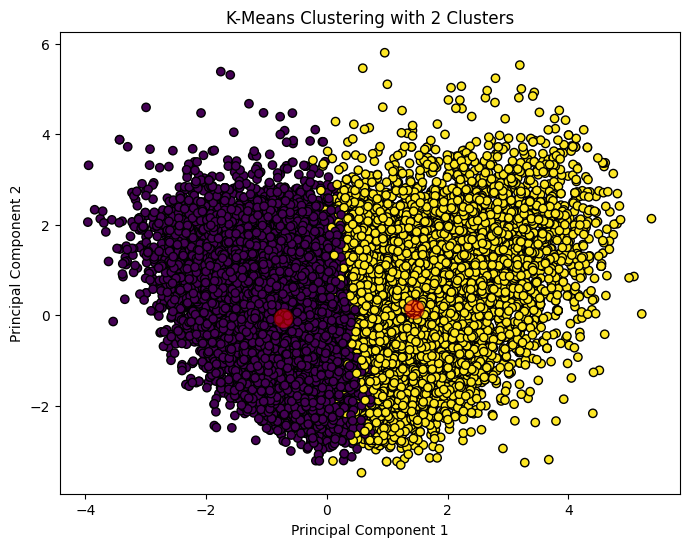

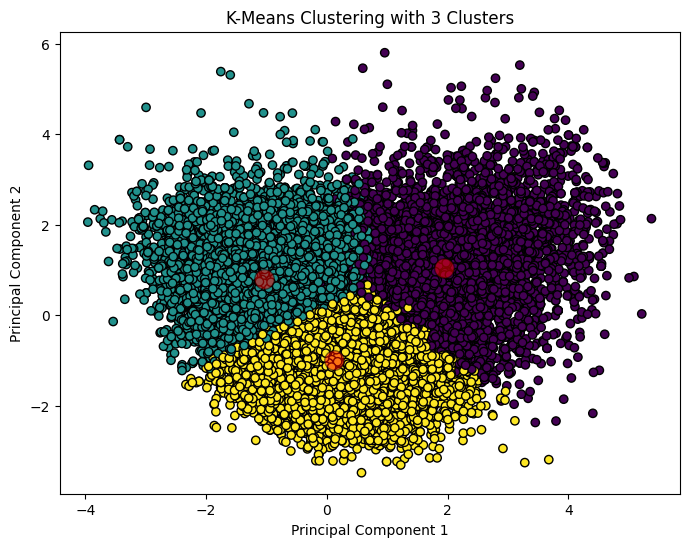

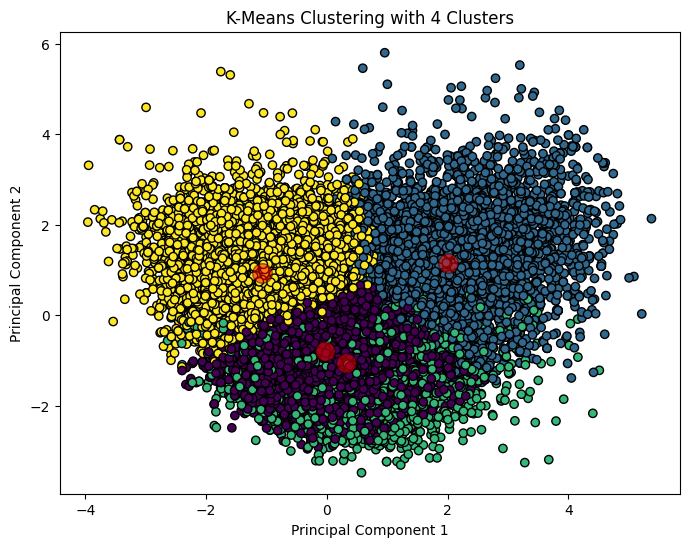

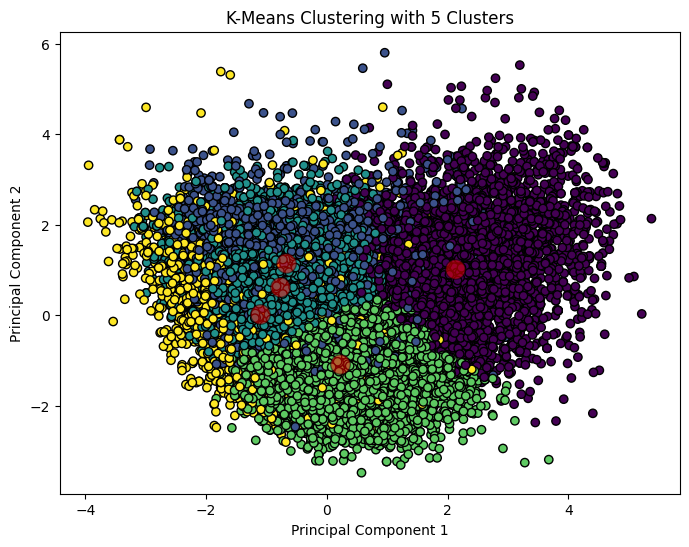

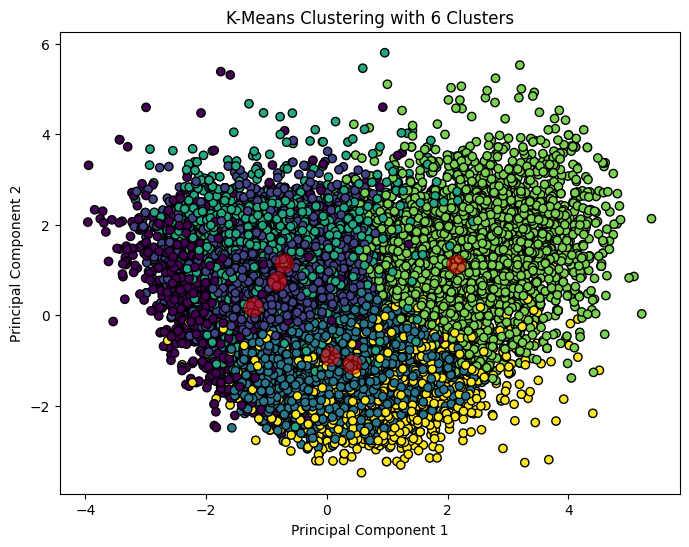

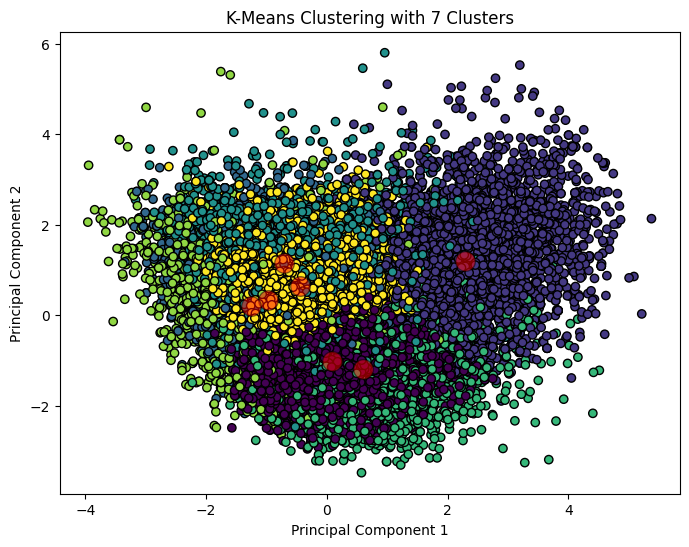

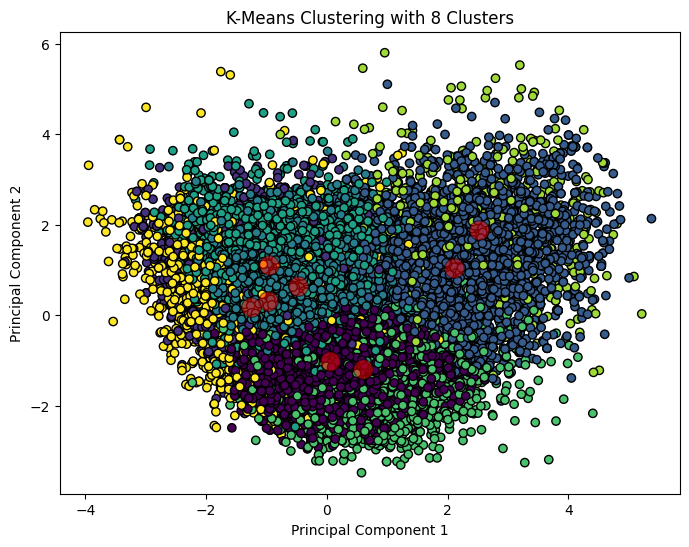

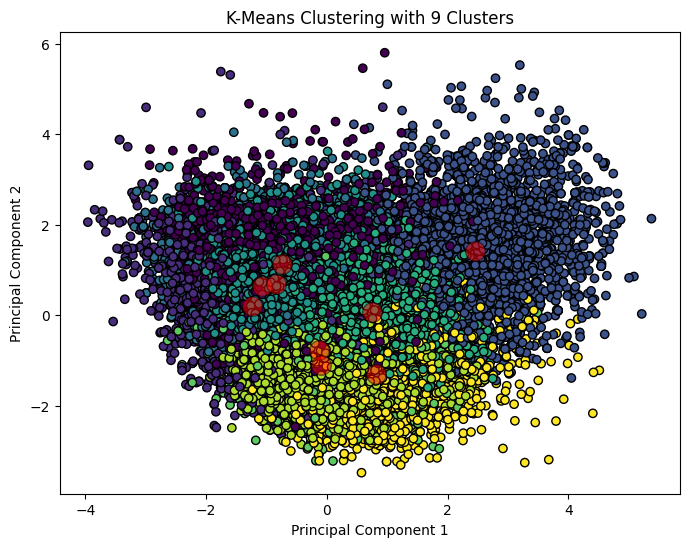

In [ ]:
# TODO: Write your code here

# Iterate through different number of clusters
for n_clusters in range(2, 10):
    # Instantiate and fit the K-Means model
    kmeans = KMeans(n_clusters=n_clusters, max_iter=100, tol=1e-4)
    kmeans.fit(X_pca)

    # Get the cluster labels and centroids
    labels = kmeans.labels
    centroids = kmeans.centroids

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the data points colored by their cluster
    ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='black')

    # Plot the cluster centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='red', alpha=0.5, edgecolors='black')

    # Add labels and title
    ax.set_title(f"K-Means Clustering with {n_clusters} Clusters")
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")



    plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

In [ ]:
# TODO: Write your code here

# Compute Silhouette scores and WSS for different numbers of clusters
silhouette_scores = []
wss_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_pca)

    # Compute Silhouette score
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels))

    # Compute WSS
    wss_scores.append(kmeans.inertia)

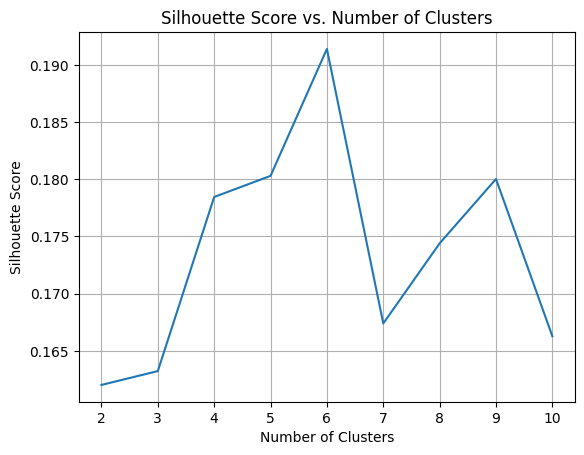

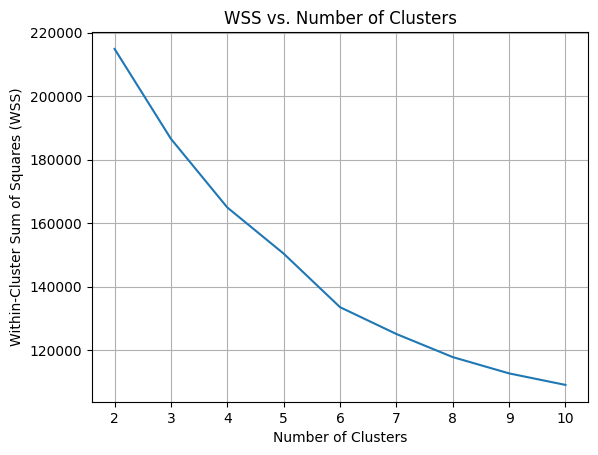

In [ ]:
# Plot the Silhouette score
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid()
plt.show()

# Plot the WSS score
plt.plot(range(2, 11), wss_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.title('WSS vs. Number of Clusters')
plt.grid()
plt.show()

To determine the optimal number of clusters using the Silhouette score and the Within-Cluster Sum of Squares (WSS) score, we can follow these steps:

1. **Compute the Silhouette score and WSS score for different numbers of clusters**:
   - Start by looping through a range of cluster numbers (e.g., from 2 to 10).
   - For each number of clusters, fit a K-Means model and compute the Silhouette score and the WSS score.
   - Store the Silhouette scores and WSS scores in separate lists.

2. **Plot the Silhouette score and WSS score**:
   - Create two separate plots, one for the Silhouette score and one for the WSS score.
   - On the Silhouette score plot, plot the Silhouette scores on the y-axis and the number of clusters on the x-axis.
   - On the WSS score plot, plot the WSS scores on the y-axis and the number of clusters on the x-axis.

3. **Analyze the Silhouette score plot**:
   - The Silhouette score measures how well each data point fits into its assigned cluster. The score ranges from -1 to 1, with a higher score indicating better clustering.
   - Look for the number of clusters that maximizes the Silhouette score. This is typically considered the optimal number of clusters, as it indicates that the data points are well-matched to their assigned clusters and poorly-matched to other clusters.

4. **Analyze the WSS score plot**:
   - The WSS score is the sum of the squared distances between each data point and its assigned cluster centroid. A lower WSS score indicates more compact and well-separated clusters.
   - Look for the "elbow" in the WSS plot, which is the point where the curve starts to flatten out. This elbow point can suggest the optimal number of clusters, as adding more clusters beyond this point doesn't significantly reduce the WSS score.

Based on the WSS plot, we observe that the slope of the curve from 6 to 7 clusters decreases significantly compared to the slope from 5 to 6 clusters. From this, we conclude that the optimal number of clusters for WSS is 6.

Additionally, from the Silhouette score plot, we observe that the maximum value is obtained for 6 clusters.


**Therefore, the optimal number of clusters is 6.**

# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [ ]:
k_optimal = 6
kmeans = KMeans(n_clusters=k_optimal)
_ = kmeans.fit(X_pca)

In [ ]:
# TODO: Write your code here

labels = kmeans.labels

# Iterate over each cluster
for i in range(k_optimal):
    # Get the indices of data points belonging to the current cluster
    cluster_indices = np.where(labels == i)[0]

    # Randomly select two song indices from the current cluster
    song1_idx, song2_idx = np.random.choice(cluster_indices, size=2, replace=False)

    print(f"Cluster {i+1}:\n")
    print("first song: ")
    print(df.loc[song1_idx])
    print("\nsecond song:")
    print(df.loc[song2_idx])
    print("__________________________________________________________________________")


Cluster 1:

first song: 
track_name          Junk - Remastered 2011
danceability                         0.712
energy                              0.0862
valence                              0.315
tempo                               90.666
acousticness                         0.814
instrumentalness                  0.000259
liveness                             0.191
speechiness                         0.0325
Name: 11324, dtype: object

second song:
track_name          Shower Me With Your Love
danceability                           0.632
energy                                 0.356
valence                                0.197
tempo                                 131.28
acousticness                           0.523
instrumentalness                    0.000006
liveness                              0.0961
speechiness                           0.0309
Name: 24866, dtype: object
__________________________________________________________________________
Cluster 2:

first song: 
track_name     

As we observe from the 2 selected songs in clusters:

**for cluster 1:**
the songs in this cluster are likely to have a common instrumentalness around 0 and a speechiness value of 0.031.

**for cluster 2:**
the songs in this cluster are likely to have a common energy around 0.8 and an acousticness value of 0.05 and a liveness value of 0.85.

**for cluster 3:**
the songs in this cluster are likely to have a common danceability around 0.718 and a liveness value of 0.1.

**for cluster 4:**
the songs in this cluster are likely to have a common tempo around 120 and an instrumentalness value of 0.9 and an acousticness value of 0.39 .

**for cluster 5:**
the songs in this cluster are likely to have a common tempo around 100 and a liveness value of 0.07.

**for cluster 6:**
the songs in this cluster are likely to have a common tempo around 174 and an instrumentalness value of 0.

Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

In [ ]:
# TODO: Write your code here
X_2d = TSNE(n_components=2, random_state=42).fit_transform(X_pca)

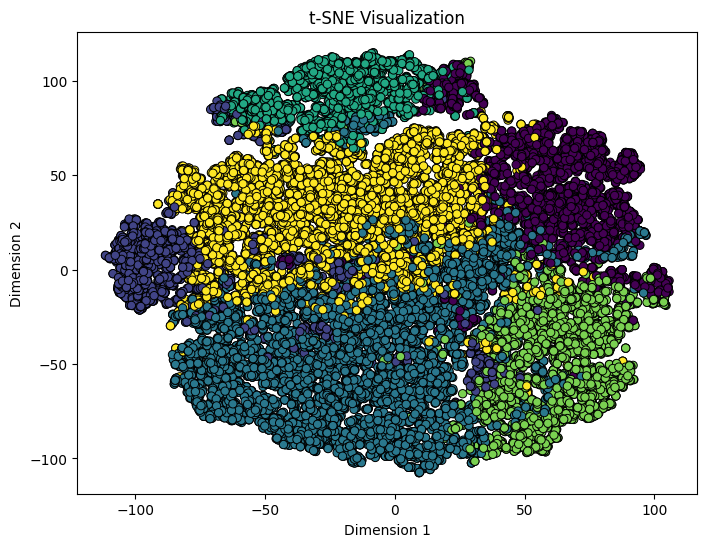

In [ ]:
# Plot the 2D t-SNE visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, edgecolors='black', linewidths=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a powerful dimensionality reduction technique used for visualizing high-dimensional data in a low-dimensional space, typically 2D or 3D. It is particularly useful for exploring the structure and clustering of complex datasets.

## How t-SNE Works

t-SNE works by converting the high-dimensional Euclidean distances between data points into conditional probabilities that represent similarities. It then tries to find a low-dimensional embedding where the similarities are preserved as much as possible.

The algorithm consists of three main steps:

1. **Calculating the pairwise similarities in the high-dimensional space**: For each data point, t-SNE computes the conditional probability that other data points would pick it as their neighbor if neighbors were picked in proportion to their Gaussian density centered at that data point. This is done using a Gaussian kernel.

2. **Mapping the data to a low-dimensional space**: t-SNE initializes the low-dimensional embedding randomly and then iteratively updates the positions of the points to minimize the Kullback-Leibler divergence between the joint probabilities in the high-dimensional and low-dimensional spaces.

3. **Optimizing the low-dimensional representation**: The algorithm uses gradient descent to minimize the Kullback-Leibler divergence, which measures how well the low-dimensional representation preserves the high-dimensional structure of the data.

## Interpreting t-SNE Visualizations

The resulting t-SNE visualization can provide valuable insights into the structure and clustering of the data:

- **Clusters**: Data points that are close together in the t-SNE plot likely belong to the same cluster or group in the high-dimensional space. The algorithm tries to preserve the local structure of the data, so points that are neighbors in the high-dimensional space will be neighbors in the low-dimensional plot.

- **Outliers**: Data points that are far away from the main clusters in the t-SNE plot may be outliers or anomalies in the high-dimensional space.

- **Manifold structure**: If the data lies on a non-linear manifold in the high-dimensional space, t-SNE can often reveal this structure in the low-dimensional plot. For example, if the data forms a spiral or a Swiss roll in the high-dimensional space, t-SNE may be able to uncover this structure.

However, it's important to note that t-SNE does not always preserve the global structure of the data. The algorithm focuses on preserving local neighborhoods, which can lead to distortions in the overall shape of the data. Additionally, the resulting visualization can be sensitive to the choice of hyperparameters, such as the perplexity and the number of iterations.

## Evaluating the Quality of t-SNE Clustering

**Visual inspection**: Examine the t-SNE plot for well-separated clusters and compact groupings of data points. If the clusters are clearly defined and there is minimal overlap between them, it suggests that the data points are well-clustered.

Based on the plot we observe, the color-coded clusters from the previous clustering steps have distinct boundaries and are reasonably separated without much overlap. However, there are a few data points of different colors that have encroached into the regions of other clusters, though the percentage of such data points is low.

